<a href="https://www.kaggle.com/code/absndus/data-science-portfolio-rental-trends?scriptVersionId=134306807" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Science Portfolio - Rent Trends Across the US Notebook ##

### Created by: Albert Schultz ###

### Date Created: 06/10/2023 ###

### Version: 1.00 ###

### Executive Summary ###
This notebook goes over the process of importing the historical rent growth 2018 to 2023 csv worksheet into the notebook to clean, prune, and analyze to find various trends across the US rent growth. This mini-project showcase the process of importing large dataset (csv) from the **apartment list** website, performing Extraction, Transformation and Loading (ETL) and data exploration and visualization to understand the rent trend in a small sample dataset. 

## Table of Contents ##

1. [Introduction](#1.-Introduction)
2. [Understanding Purpose, Goals, and Vision](#2.-Understanding-Purpose,-Goals,-and-Vision)
3. [Import and Review the Rental Dataset](#3.-Import-and-the-Rental-Dataset)
4. [Dataset Cleaning](#4.-Dataset-Cleaning)
5. [Exploring the Subsets of the Rental Historical Data](#5.-Exploring-the-Subsets-of-the-Rental-Historical-Data)
5. [Summary](#Summary)

## 1. Introduction ##

This project portfolio notebook reviews the trends of the historical rent growth across the United States and the various trends of rental growth across the United States. The dataset was pulled from **Apartment LIst** website at the url https://www.apartmentlist.com/research/category/data-rent-estimates.

**Initialize the Notebook for data access, import library modules, and set the working directory for this project.**

In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rental-growth/Apartment_List_Rent_Growth_YoY_2023_05.csv


## 2. Understanding Purpose, Goals, and Vision ##

The vision of this project is to create trends after cleaning the data set and exploring the data set to understand the rent growths across the US.

**Vision:** To showcase my data science skills and create trends to understand the rental increase across the US.

**Goals:**
1. Review the Rental Historical Growth CSV file by importing the file into this notebook.
2. Review the dataset for data abnormalities.
3. Review the dataset's description using the **.describe()** and its datatypes using the **.dtypes** method to see if the datatypes needs to be converted for analysis.
4. Perform lookup conditional test for North Dakota and Minnesota to confirm that the table is properly formatted.
5. Analyze and find the trend of the rental increase to see if population sizes for each state were correlated to the increase in rent year after year.
6. Analyze and find the trend of the rental increase to see which state has the highest rate of rental increases and on what given year.
7. Create a categorical plot of the states with the rates of increase that were summarized between 2018 until 2023.

## 3. Import and Review the Rental Dataset ##

**Introduction:** This section goes over the importing of the rental dataset that went back from 2018 to 2023 for the historical increases of rent across all of the states of United States.

1. Import the csv file.

In [110]:
rentalgrowth = pd.read_csv('/kaggle/input/rental-growth/Apartment_List_Rent_Growth_YoY_2023_05.csv')

2. Review the data types of the Rental Growth dataset.

In [111]:
rentalgrowth.dtypes

location_name          object
location_type          object
location_fips_code      int64
population              int64
state                  object
                       ...   
2023_01               float64
2023_02               float64
2023_03               float64
2023_04               float64
2023_05               float64
Length: 72, dtype: object

**Conclusions:** Based on the results, there were no need to convert the attributes' datatypes.

3. Review the first 3 rows with attributes shown.

In [112]:
rentalgrowth.head(3)

,location_name,location_type,location_fips_code,population,state,county,metro,2018_01,2018_02,2018_03,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
0,United States,National,0,324697795,NaN,NaN,NaN,0.0180,0.0194,0.0228,...,0.0944,0.0689,0.0519,0.0408,0.0352,0.0301,0.0273,0.0240,0.0178,0.0089
1,California,State,6,39283497,California,NaN,NaN,0.0200,0.0231,0.0346,...,0.0928,0.0675,0.0512,0.0410,0.0336,0.0218,0.0144,0.0065,0.0004,-0.0071
2,Texas,State,48,28260856,Texas,NaN,NaN,0.0147,0.0164,0.0194,...,0.1002,0.0779,0.0609,0.0513,0.0441,0.0390,0.0332,0.0281,0.0204,0.0108


4. Print out North Dakota and Minnesota observation.

In [113]:
rentalgrowth[(rentalgrowth['location_name'] == 'North Dakota') | (rentalgrowth['location_name'] == 'Minnesota')]

,location_name,location_type,location_fips_code,population,state,county,metro,2018_01,2018_02,2018_03,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
33,Minnesota,State,27,5563378,Minnesota,NaN,NaN,0.0486,0.0507,0.0493,...,0.0379,0.0274,0.0251,0.0243,0.0281,0.0268,0.0242,0.0183,0.0119,0.0074
216,North Dakota,State,38,756717,North Dakota,NaN,NaN,0.0271,0.0362,0.0278,...,0.0770,0.0866,0.1010,0.1004,0.0880,0.0732,0.0762,0.0901,0.1042,0.1094


5. Summarize by using the describe method.

In [114]:
rentalgrowth.describe()

,location_fips_code,population,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
count,1.136000e+03,1.136000e+03,1034.000000,1042.000000,1052.000000,1052.000000,1057.000000,1068.000000,1066.000000,1069.000000,...,1133.000000,1133.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000
mean,1.373210e+06,1.049037e+06,0.026941,0.029279,0.031078,0.032142,0.029311,0.029499,0.030227,0.033252,...,0.090304,0.065322,0.050338,0.040728,0.036456,0.032559,0.030334,0.026538,0.018957,0.009385
std,1.803595e+06,9.870777e+06,0.063193,0.060842,0.054518,0.059935,0.055085,0.054164,0.049280,0.045938,...,0.054153,0.051805,0.051780,0.047493,0.044745,0.042994,0.041052,0.039281,0.037713,0.036640
min,0.000000e+00,5.177000e+03,-0.380900,-0.294300,-0.157000,-0.321700,-0.104200,-0.319700,-0.116700,-0.146200,...,-0.230100,-0.224600,-0.221500,-0.219100,-0.199700,-0.172400,-0.143000,-0.123400,-0.121900,-0.126000
25%,2.785175e+04,8.174375e+04,0.000925,0.003325,0.003875,0.004600,0.003700,0.004575,0.006025,0.012700,...,0.059000,0.036400,0.021375,0.014700,0.011000,0.008900,0.005875,0.000275,-0.006150,-0.014800
50%,2.909880e+05,2.017355e+05,0.023150,0.023750,0.026650,0.027400,0.024500,0.023800,0.026600,0.032100,...,0.089000,0.065800,0.049550,0.041650,0.037200,0.032750,0.029500,0.025800,0.018950,0.009300
75%,2.510156e+06,5.619162e+05,0.052475,0.050275,0.051475,0.052325,0.048900,0.048700,0.048100,0.051300,...,0.120400,0.094100,0.075000,0.065225,0.059400,0.055200,0.053400,0.049125,0.041050,0.031575
max,5.553000e+06,3.246978e+08,0.574200,0.593800,0.564700,0.524600,0.542200,0.534700,0.523700,0.452300,...,0.501600,0.476000,0.382400,0.261100,0.259900,0.238900,0.219900,0.213600,0.209700,0.213100


6. Review the dataframe for any potential data skews.

In [115]:
rentalgrowth.skew(numeric_only=True)

location_fips_code     1.075208
population            31.213864
2018_01                1.303399
2018_02                2.877783
2018_03                3.259238
                        ...    
2023_01                0.271225
2023_02                0.318796
2023_03                0.385279
2023_04                0.377527
2023_05                0.456964
Length: 67, dtype: float64

7. Find unique values in the pandas **rentalgrowth dataframe**.

In [116]:
len(rentalgrowth['location_name'].unique())

1074

## 4. Dataset Cleaning ##

**Introduction:** This section goes over the steps of cleaning the rental_growth dataframe.

1. Display only **states** observations and leave everything as default.

In [117]:
states_name_df = rentalgrowth[rentalgrowth['location_type'] == 'State']
states_name_df

,location_name,location_type,location_fips_code,population,state,county,metro,2018_01,2018_02,2018_03,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
1,California,State,6,39283497,California,NaN,NaN,0.0200,0.0231,0.0346,...,0.0928,0.0675,0.0512,0.0410,0.0336,0.0218,0.0144,0.0065,0.0004,-0.0071
2,Texas,State,48,28260856,Texas,NaN,NaN,0.0147,0.0164,0.0194,...,0.1002,0.0779,0.0609,0.0513,0.0441,0.0390,0.0332,0.0281,0.0204,0.0108
3,Florida,State,12,20901636,Florida,NaN,NaN,0.0345,0.0358,0.0425,...,0.1229,0.0785,0.0510,0.0366,0.0298,0.0243,0.0194,0.0152,0.0064,-0.0043
4,New York,State,36,19572319,New York,NaN,NaN,0.0055,0.0012,0.0083,...,0.1228,0.0889,0.0643,0.0409,0.0329,0.0260,0.0265,0.0211,0.0183,0.0111
7,Pennsylvania,State,42,12791530,Pennsylvania,NaN,NaN,0.0206,0.0181,0.0183,...,0.0753,0.0522,0.0381,0.0252,0.0196,0.0129,0.0140,0.0144,0.0167,0.0119
8,Illinois,State,17,12770631,Illinois,NaN,NaN,0.0325,0.0207,0.0180,...,0.0794,0.0680,0.0656,0.0646,0.0638,0.0605,0.0622,0.0642,0.0597,0.0510
9,Ohio,State,39,11655397,Ohio,NaN,NaN,0.0243,0.0159,0.0172,...,0.1056,0.0843,0.0690,0.0610,0.0577,0.0535,0.0508,0.0482,0.0391,0.0279
10,Georgia,State,13,10403847,Georgia,NaN,NaN,0.0297,0.0249,0.0252,...,0.0748,0.0396,0.0190,0.0064,0.0037,0.0031,0.0042,0.0044,0.0004,-0.0073
11,North Carolina,State,37,10264876,North Carolina,NaN,NaN,0.0078,0.0116,0.0073,...,0.1310,0.0960,0.0722,0.0618,0.0560,0.0475,0.0432,0.0366,0.0271,0.0132
13,Michigan,State,26,9965265,Michigan,NaN,NaN,0.0203,0.0182,0.0183,...,0.0675,0.0444,0.0263,0.0167,0.0108,0.0096,0.0084,0.0079,0.0037,-0.0016


2. Create a new dataframe that has just the states' name and the yearly increases and decreases of the rates of rent.

In [118]:
states_name_trend_r_rate_df = states_name_df[states_name_df['location_type'] == 'State']
states_name_trend_r_rate_df = states_name_df.drop_duplicates(subset=['location_name'])
states_name_trend_r_rate_df = states_name_df.drop(['location_type', 'location_fips_code', 'state', 'county', 'metro'], axis=1)

#Show the appended states_name_df.
states_name_trend_r_rate_df

,location_name,population,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
1,California,39283497,0.0200,0.0231,0.0346,0.0396,0.0381,0.0354,0.0370,0.0400,...,0.0928,0.0675,0.0512,0.0410,0.0336,0.0218,0.0144,0.0065,0.0004,-0.0071
2,Texas,28260856,0.0147,0.0164,0.0194,0.0178,0.0145,0.0159,0.0199,0.0266,...,0.1002,0.0779,0.0609,0.0513,0.0441,0.0390,0.0332,0.0281,0.0204,0.0108
3,Florida,20901636,0.0345,0.0358,0.0425,0.0458,0.0439,0.0433,0.0436,0.0475,...,0.1229,0.0785,0.0510,0.0366,0.0298,0.0243,0.0194,0.0152,0.0064,-0.0043
4,New York,19572319,0.0055,0.0012,0.0083,0.0177,0.0268,0.0317,0.0375,0.0427,...,0.1228,0.0889,0.0643,0.0409,0.0329,0.0260,0.0265,0.0211,0.0183,0.0111
7,Pennsylvania,12791530,0.0206,0.0181,0.0183,0.0186,0.0101,0.0101,0.0182,0.0304,...,0.0753,0.0522,0.0381,0.0252,0.0196,0.0129,0.0140,0.0144,0.0167,0.0119
8,Illinois,12770631,0.0325,0.0207,0.0180,0.0103,0.0104,0.0089,0.0128,0.0180,...,0.0794,0.0680,0.0656,0.0646,0.0638,0.0605,0.0622,0.0642,0.0597,0.0510
9,Ohio,11655397,0.0243,0.0159,0.0172,0.0146,0.0209,0.0201,0.0209,0.0250,...,0.1056,0.0843,0.0690,0.0610,0.0577,0.0535,0.0508,0.0482,0.0391,0.0279
10,Georgia,10403847,0.0297,0.0249,0.0252,0.0273,0.0232,0.0222,0.0229,0.0327,...,0.0748,0.0396,0.0190,0.0064,0.0037,0.0031,0.0042,0.0044,0.0004,-0.0073
11,North Carolina,10264876,0.0078,0.0116,0.0073,0.0118,0.0114,0.0228,0.0266,0.0334,...,0.1310,0.0960,0.0722,0.0618,0.0560,0.0475,0.0432,0.0366,0.0271,0.0132
13,Michigan,9965265,0.0203,0.0182,0.0183,0.0318,0.0370,0.0364,0.0356,0.0341,...,0.0675,0.0444,0.0263,0.0167,0.0108,0.0096,0.0084,0.0079,0.0037,-0.0016


3. Review the trend dataframe **states_name_trend_r_rate_df**.

In [119]:
states_name_trend_r_rate_df.dtypes

location_name     object
population         int64
2018_01          float64
2018_02          float64
2018_03          float64
                  ...   
2023_01          float64
2023_02          float64
2023_03          float64
2023_04          float64
2023_05          float64
Length: 67, dtype: object

**Conclusions:** Based on the information above, the trend dataframe can be analyzed later during the EDA phase.

3. Create a dataframe that has just have the  Midwest states.

In [120]:
midwest_states_df = rentalgrowth[(rentalgrowth['location_name'] == 'North Dakota') | (rentalgrowth['location_name'] == 'Minnesota') | (rentalgrowth['location_name'] == 'South Dakota') | (rentalgrowth['location_name'] == 'Montana')]

In [121]:
midwest_states_df

,location_name,location_type,location_fips_code,population,state,county,metro,2018_01,2018_02,2018_03,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
33,Minnesota,State,27,5563378,Minnesota,NaN,NaN,0.0486,0.0507,0.0493,...,0.0379,0.0274,0.0251,0.0243,0.0281,0.0268,0.0242,0.0183,0.0119,0.0074
142,Montana,State,30,1050649,Montana,NaN,NaN,NaN,NaN,NaN,...,0.0592,0.0283,0.0507,0.0269,0.0318,0.0178,0.0384,0.0561,0.0575,0.0221
181,South Dakota,State,46,870638,South Dakota,NaN,NaN,-0.0198,-0.0287,-0.0133,...,0.1709,0.1415,0.1196,0.0769,0.0538,0.0275,0.0203,0.0179,0.0137,0.0040
216,North Dakota,State,38,756717,North Dakota,NaN,NaN,0.0271,0.0362,0.0278,...,0.0770,0.0866,0.1010,0.1004,0.0880,0.0732,0.0762,0.0901,0.1042,0.1094


4. Create a new dataframe that has the midwest states' population and the monthly rate of increases in rent cost.

In [122]:
mstates_name_trend_r_rate_df = midwest_states_df[midwest_states_df['location_type'] == 'State']
mstates_name_trend_r_rate_df = midwest_states_df.drop_duplicates(subset=['location_name'])
mstates_name_trend_r_rate_df = midwest_states_df.drop(['location_type', 'location_fips_code', 'state', 'county', 'metro'], axis=1)

#Show the appended states_name_df.
mstates_name_trend_r_rate_df

,location_name,population,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
33,Minnesota,5563378,0.0486,0.0507,0.0493,0.0484,0.0387,0.0403,0.0358,0.0390,...,0.0379,0.0274,0.0251,0.0243,0.0281,0.0268,0.0242,0.0183,0.0119,0.0074
142,Montana,1050649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0592,0.0283,0.0507,0.0269,0.0318,0.0178,0.0384,0.0561,0.0575,0.0221
181,South Dakota,870638,-0.0198,-0.0287,-0.0133,-0.0052,0.0040,-0.0036,-0.0066,-0.0110,...,0.1709,0.1415,0.1196,0.0769,0.0538,0.0275,0.0203,0.0179,0.0137,0.0040
216,North Dakota,756717,0.0271,0.0362,0.0278,0.0356,0.0454,0.0685,0.0810,0.0898,...,0.0770,0.0866,0.1010,0.1004,0.0880,0.0732,0.0762,0.0901,0.1042,0.1094


## 5. Exploring the Subsets of the Rental Historical Data ##

**Instroduction:** This section goes over the data explorations of the subsets of datasets to understand the Rental Trends in the United States between 2018 until 2023.

1. Review the data frame **states_name_trend_r_rate_df**.

In [123]:
states_name_trend_r_rate_df.head(5)

,location_name,population,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
1,California,39283497,0.0200,0.0231,0.0346,0.0396,0.0381,0.0354,0.0370,0.0400,...,0.0928,0.0675,0.0512,0.0410,0.0336,0.0218,0.0144,0.0065,0.0004,-0.0071
2,Texas,28260856,0.0147,0.0164,0.0194,0.0178,0.0145,0.0159,0.0199,0.0266,...,0.1002,0.0779,0.0609,0.0513,0.0441,0.0390,0.0332,0.0281,0.0204,0.0108
3,Florida,20901636,0.0345,0.0358,0.0425,0.0458,0.0439,0.0433,0.0436,0.0475,...,0.1229,0.0785,0.0510,0.0366,0.0298,0.0243,0.0194,0.0152,0.0064,-0.0043
4,New York,19572319,0.0055,0.0012,0.0083,0.0177,0.0268,0.0317,0.0375,0.0427,...,0.1228,0.0889,0.0643,0.0409,0.0329,0.0260,0.0265,0.0211,0.0183,0.0111
7,Pennsylvania,12791530,0.0206,0.0181,0.0183,0.0186,0.0101,0.0101,0.0182,0.0304,...,0.0753,0.0522,0.0381,0.0252,0.0196,0.0129,0.0140,0.0144,0.0167,0.0119


The range of the rate was from **January 2018** to **May 2023** with increment by **one month** that lists **47** states that has been captured for analysis.

In [124]:
#Describe the dataset of states_name_trend_r_rate_df dataframe.
states_name_trend_r_rate_df.describe()

,population,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,2018_09,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
count,4.700000e+01,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,45.000000,45.000000,45.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,6.812417e+06,0.021828,0.020367,0.021417,0.021722,0.019830,0.021565,0.025133,0.031829,0.033062,...,0.089143,0.066851,0.053979,0.044315,0.039972,0.036353,0.035053,0.033574,0.027630,0.017998
std,7.412325e+06,0.037349,0.034325,0.034096,0.029910,0.027752,0.027515,0.026593,0.027066,0.028085,...,0.033936,0.033102,0.034957,0.034693,0.033262,0.031593,0.030769,0.030989,0.031145,0.030760
min,5.810240e+05,-0.093800,-0.072200,-0.051900,-0.052100,-0.050000,-0.043800,-0.035500,-0.029800,-0.049800,...,-0.004600,-0.020500,-0.049300,-0.036800,-0.037500,-0.040900,-0.036300,-0.033600,-0.044700,-0.059200
25%,2.501553e+06,0.004450,0.005550,0.004225,0.007225,0.005000,0.006250,0.012800,0.018000,0.021600,...,0.070250,0.045650,0.035400,0.025000,0.020950,0.015800,0.016900,0.014800,0.008450,-0.001900
50%,4.876250e+06,0.019400,0.019450,0.018300,0.017900,0.013850,0.017850,0.021300,0.030300,0.030000,...,0.083000,0.067500,0.051200,0.041700,0.037100,0.035400,0.034300,0.036000,0.027100,0.016600
75%,7.929285e+06,0.032450,0.033775,0.031225,0.035550,0.037825,0.039325,0.038000,0.042900,0.044300,...,0.109950,0.087050,0.073550,0.064950,0.057450,0.057400,0.059650,0.056150,0.046850,0.038550
max,3.928350e+07,0.173100,0.121300,0.114700,0.088500,0.082900,0.086300,0.091900,0.116200,0.110600,...,0.170900,0.141500,0.125300,0.123100,0.118400,0.114200,0.098800,0.090100,0.104200,0.109400


2. Review the data from **mstates_name_trend_r_rate_df**.

In [125]:
mstates_name_trend_r_rate_df.head(5)

,location_name,population,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
33,Minnesota,5563378,0.0486,0.0507,0.0493,0.0484,0.0387,0.0403,0.0358,0.0390,...,0.0379,0.0274,0.0251,0.0243,0.0281,0.0268,0.0242,0.0183,0.0119,0.0074
142,Montana,1050649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0592,0.0283,0.0507,0.0269,0.0318,0.0178,0.0384,0.0561,0.0575,0.0221
181,South Dakota,870638,-0.0198,-0.0287,-0.0133,-0.0052,0.0040,-0.0036,-0.0066,-0.0110,...,0.1709,0.1415,0.1196,0.0769,0.0538,0.0275,0.0203,0.0179,0.0137,0.0040
216,North Dakota,756717,0.0271,0.0362,0.0278,0.0356,0.0454,0.0685,0.0810,0.0898,...,0.0770,0.0866,0.1010,0.1004,0.0880,0.0732,0.0762,0.0901,0.1042,0.1094


In [126]:
#Describe the dataset of mstates_name_trend_r_rate_df dataframe.
mstates_name_trend_r_rate_df.describe()

,population,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,2018_09,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
count,4.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2.060346e+06,0.018633,0.019400,0.021267,0.026267,0.029367,0.035067,0.036733,0.039267,0.034533,...,0.086250,0.070950,0.074100,0.057125,0.050425,0.036325,0.039775,0.045600,0.046825,0.035725
std,2.338488e+06,0.034977,0.042282,0.031807,0.027992,0.022222,0.036334,0.043807,0.050401,0.044210,...,0.058653,0.054583,0.043751,0.037660,0.027499,0.024977,0.025499,0.034656,0.043676,0.049741
min,7.567170e+05,-0.019800,-0.028700,-0.013300,-0.005200,0.004000,-0.003600,-0.006600,-0.011000,-0.010200,...,0.037900,0.027400,0.025100,0.024300,0.028100,0.017800,0.020300,0.017900,0.011900,0.004000
25%,8.421578e+05,0.003650,0.003750,0.007250,0.015200,0.021350,0.018350,0.014600,0.014000,0.012700,...,0.053875,0.028075,0.044300,0.026250,0.030875,0.024550,0.023225,0.018200,0.013250,0.006550
50%,9.606435e+05,0.027100,0.036200,0.027800,0.035600,0.038700,0.040300,0.035800,0.039000,0.035600,...,0.068100,0.057450,0.075850,0.051900,0.042800,0.027150,0.031300,0.037200,0.035600,0.014750
75%,2.178831e+06,0.037850,0.043450,0.038550,0.042000,0.042050,0.054400,0.058400,0.064400,0.056900,...,0.100475,0.100325,0.105650,0.082775,0.062350,0.038925,0.047850,0.064600,0.069175,0.043925
max,5.563378e+06,0.048600,0.050700,0.049300,0.048400,0.045400,0.068500,0.081000,0.089800,0.078200,...,0.170900,0.141500,0.119600,0.100400,0.088000,0.073200,0.076200,0.090100,0.104200,0.109400


3. Create a histogram to show the 4 states (**Midwest**) that has the rate of increase and decrease in percentages.

Enter year:  2023
Enter month:  01


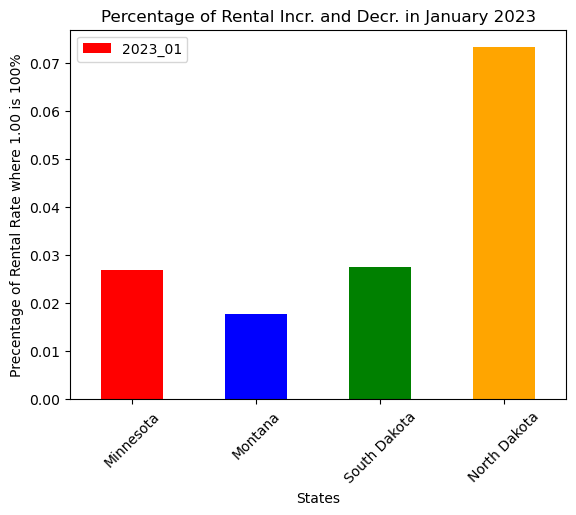

In [127]:
#User enters the year and month to view the rates of the upper Midwest. 
month_year = input('Enter year: ') + '_' + input('Enter month: ')

#Create the necessary variables needed for histogram. 
month_year_m = month_year[5] + month_year[6]
year_n = month_year[0:4]

#Create an elif statements for the months selections. 
if month_year_m == '01':
    month_name = 'January'
elif month_year_m == '02':
    month_name = 'February'
elif month_year_m == '03':
    month_name = 'March'
elif month_year_m == '04':
    month_name = 'April'
elif month_year_m == '05':
    month_name = 'May'
elif month_year_m == '06':
    month_name = 'June'
elif month_year_m == '07':
    month_name = 'July'
elif month_year_m == '08':
    month_name = 'August'
elif month_year_m == '09':
    month_name = 'September'
elif month_year_m == '10':
    month_name = 'October'
elif month_year_m == '11':
    month_name = 'November'
elif month_year_m == '12':
    month_name = 'December'
else: 
    month_name = 'n/a'

#Create a histogram categorical (states) caomparison between the Midwest states. 
colors = {'Minnesota': 'red', 'Montana': 'blue', 'South Dakota': 'green', 'North Dakota': 'orange'}
mstates_name_trend_r_rate_df.plot(kind='bar', x='location_name', y=month_year, title='Percentage of Rental Incr. and Decr. in ' + month_name + ' ' + year_n, edgecolor='none', color=mstates_name_trend_r_rate_df['location_name'].map(colors))

plt.xticks(rotation=45)
plt.ylabel('Precentage of Rental Rate where 1.00 is 100%')
plt.xlabel('States')
plt.show()
plt.close()

4. Create a line chart that shows the rate of rental increase and decrease for the state of North Dakota over the **years** where rate of increase or decrease is on the **y-axis**. 

In [128]:
#Capture just North Dakota by the location name as North Dakota. 
north_dakota_df= rentalgrowth[(rentalgrowth['location_name'] == 'North Dakota')]

#Clean the new dataframe and drop the columns; location_type, location_fips_code, population, state, county and metro. 
north_dakota_df = north_dakota_df.drop(['location_type', 'location_fips_code', 'population', 'state', 'county', 'metro'], axis=1)


#Print out the north_dakota_df dataframe. 
north_dakota_df

,location_name,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,2018_09,...,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04,2023_05
216,North Dakota,0.0271,0.0362,0.0278,0.0356,0.0454,0.0685,0.081,0.0898,0.0782,...,0.077,0.0866,0.101,0.1004,0.088,0.0732,0.0762,0.0901,0.1042,0.1094


In [129]:
#Transform the horizontal table into a manage and easy to use vertical table where the columns are Year Month and Rental Rate values in the other column. 
north_dakota_dfv = north_dakota_df.melt(var_name = 'Year Month', value_name = 'Rental Rate')

#Drop the first row that contains the column names. 
north_dakota_dfv = north_dakota_dfv.drop(north_dakota_dfv.index[0])

#Print out the dfv dataframe. 
north_dakota_dfv

,Year Month,Rental Rate
1,2018_01,0.0271
2,2018_02,0.0362
3,2018_03,0.0278
4,2018_04,0.0356
5,2018_05,0.0454
...,...,...
61,2023_01,0.0732
62,2023_02,0.0762
63,2023_03,0.0901
64,2023_04,0.1042


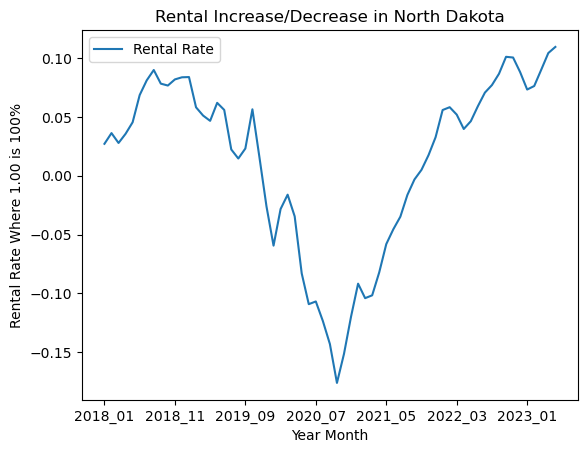

In [130]:
#Plot a line graph. 
north_dakota_dfv.set_index('Year Month', inplace=True)

north_dakota_dfv.plot(kind='line')
plt.xlabel('Year Month')
plt.ylabel('Rental Rate Where 1.00 is 100%')
plt.title('Rental Increase/Decrease in North Dakota')
plt.show()

Based on what I am seeing, the rent rate decreased from the summer of 2018 to July 2020 and then greatly increased in rental rate to 10% during the beginning of 2023. If you wish to continue to review this dataset and this notebook, feel free to copy and edit this notebook in your own Kaggle environment. 

## Summary ##

This is a short ETL to data exploration and charting of pulling the national rent data across the United States from 2018 of January to 2023 of May and sampled the dataset down to just the upper Midwest states and then to the good ol' home state of North Dakota. If you wish to continue working on this dataset, please feel free to copy and edit the notebook in your new notebook environment in Kaggle. :)